In [1]:
import pandas as pd

# Create the dataset
data = {
    'town': ['monroe township', 'monroe township', 'monroe township', 'monroe township', 'monroe township',
             'west windsor', 'west windsor', 'west windsor', 'west windsor', 'robinsville', 'robinsville', 'robinsville', 'robinsville'],
    'area': [2600, 3000, 3200, 3600, 4000, 2600, 2800, 3300, 3600, 2600, 2900, 3100, 3600],
    'price': [550000, 565000, 610000, 680000, 725000, 585000, 615000, 650000, 710000, 575000, 600000, 620000, 695000]
}

# Create the DataFrame
df = pd.DataFrame(data)

df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [2]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le.fit_transform(df.town)

array([0, 0, 0, 0, 0, 2, 2, 2, 2, 1, 1, 1, 1])

In [3]:
df2= df.copy()
df2.town = le.fit_transform(df.town)
df2

,town,area,price
0,0,2600,550000
1,0,3000,565000
2,0,3200,610000
3,0,3600,680000
4,0,4000,725000
5,2,2600,585000
6,2,2800,615000
7,2,3300,650000
8,2,3600,710000
9,1,2600,575000


In [21]:
# Apply One-Hot Encoding using pandas
df_encoded = pd.get_dummies(df, columns=['town'])

# Display the DataFrame with One-Hot Encoding applied
df_encoded.dtypes

area                    int64
price                   int64
town_monroe township     bool
town_robinsville         bool
town_west windsor        bool
dtype: object

In [22]:
def convert_bool_to_int(df):
    # Convert all boolean columns to int (0 and 1)
    bool_columns = df.select_dtypes(include='bool').columns
    df[bool_columns] = df[bool_columns].astype(int)
    return df

df_encoded = convert_bool_to_int(df_encoded)

# Display the updated DataFrame
print(df_encoded.dtypes)
df_encoded

area                    int64
price                   int64
town_monroe township    int64
town_robinsville        int64
town_west windsor       int64
dtype: object


,area,price,town_monroe township,town_robinsville,town_west windsor
0,2600,550000,1,0,0
1,3000,565000,1,0,0
2,3200,610000,1,0,0
3,3600,680000,1,0,0
4,4000,725000,1,0,0
5,2600,585000,0,0,1
6,2800,615000,0,0,1
7,3300,650000,0,0,1
8,3600,710000,0,0,1
9,2600,575000,0,1,0


# Signle variable linear regression

In [25]:
X, y = df_encoded.area.values, df_encoded.price.values
X, y

(array([2600, 3000, 3200, 3600, 4000, 2600, 2800, 3300, 3600, 2600, 2900,
        3100, 3600]),
 array([550000, 565000, 610000, 680000, 725000, 585000, 615000, 650000,
        710000, 575000, 600000, 620000, 695000]))

In [27]:
X.shape

(13,)

In [29]:

# Reshape the 'area' column to make it 2D (required by MinMaxScaler)
X_area = df['area'].values.reshape(-1, 1)
X_area.shape

(13, 1)

In [30]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


scaler = MinMaxScaler()

# Fit the scaler and transform 'area' feature
X_normalized = scaler.fit_transform(X_area)

X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)


In [31]:
# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Get the model's intercept and slope
intercept = model.intercept_
slope = model.coef_[0]

# Display the intercept and slope
print(f"Intercept (theta_0): {intercept}")
print(f"Slope (theta_1): {slope}")

Intercept (theta_0): 566714.4495412845
Slope (theta_1): 162878.4403669724


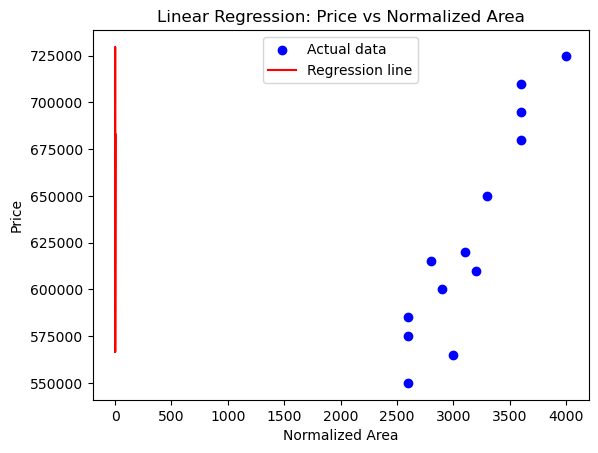

R-squared value: 0.8522293249810057


In [33]:
import matplotlib.pyplot as plt

# 3. Make predictions

y_pred = model.predict(X_test)

# ---------------------------
# 4. Visualizing the regression line
# ---------------------------
plt.scatter(X, y, color='blue', label='Actual data')
plt.plot(X_normalized, model.predict(X_normalized), color='red', label='Regression line')
plt.xlabel('Normalized Area')
plt.ylabel('Price')
plt.title('Linear Regression: Price vs Normalized Area')
plt.legend()
plt.show()

# Calculate and display the model's R-squared value (how well it fits the data)
r2_score = model.score(X_test, y_test)
print(f"R-squared value: {r2_score}")

# Multi-variable linear regressionn

In [34]:
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [37]:
X, y = df.drop('price', axis=1), df.price.values
X, y

(               town  area
 0   monroe township  2600
 1   monroe township  3000
 2   monroe township  3200
 3   monroe township  3600
 4   monroe township  4000
 5      west windsor  2600
 6      west windsor  2800
 7      west windsor  3300
 8      west windsor  3600
 9       robinsville  2600
 10      robinsville  2900
 11      robinsville  3100
 12      robinsville  3600,
 array([550000, 565000, 610000, 680000, 725000, 585000, 615000, 650000,
        710000, 575000, 600000, 620000, 695000]))

In [38]:
X

,town,area
0,monroe township,2600
1,monroe township,3000
2,monroe township,3200
3,monroe township,3600
4,monroe township,4000
5,west windsor,2600
6,west windsor,2800
7,west windsor,3300
8,west windsor,3600
9,robinsville,2600


In [39]:
X = pd.get_dummies(X , columns=['town'])
X

,area,town_monroe township,town_robinsville,town_west windsor
0,2600,True,False,False
1,3000,True,False,False
2,3200,True,False,False
3,3600,True,False,False
4,4000,True,False,False
5,2600,False,False,True
6,2800,False,False,True
7,3300,False,False,True
8,3600,False,False,True
9,2600,False,True,False


In [40]:
X = X.values

In [41]:
scaler = MinMaxScaler()

# Fit the scaler and transform 'area' feature
X_normalized = scaler.fit_transform(X)
print(X_normalized)
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

[[0.         1.         0.         0.        ]
 [0.28571429 1.         0.         0.        ]
 [0.42857143 1.         0.         0.        ]
 [0.71428571 1.         0.         0.        ]
 [1.         1.         0.         0.        ]
 [0.         0.         0.         1.        ]
 [0.14285714 0.         0.         1.        ]
 [0.5        0.         0.         1.        ]
 [0.71428571 0.         0.         1.        ]
 [0.         0.         1.         0.        ]
 [0.21428571 0.         1.         0.        ]
 [0.35714286 0.         1.         0.        ]
 [0.71428571 0.         1.         0.        ]]


In [42]:
# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Get the model's intercept and slope
intercept = model.intercept_
slope = model.coef_[0]

# Display the intercept and slope
print(f"Intercept (theta_0): {intercept}")
print(f"Slope (theta_1): {slope}")

Intercept (theta_0): 554475.7834757835
Slope (theta_1): 190735.04273504266


In [48]:
import matplotlib.pyplot as plt

# 3. Make predictions

y_pred = model.predict(X_test)

# Calculate and display the model's R-squared value (how well it fits the data)
r2_score = model.score(X_test, y_test)
print(f"R-squared value: {r2_score}")

R-squared value: 0.7057756384857772


# Exercise

Download [data](https://www.kaggle.com/datasets/giripujar/hr-analytics)!

- Do EDA to figure out which variable has clear impact on employee retention.
- plot bar charts showing impact of employee salaries on retantion.
- plot bar charts showing dept and employee retention
- now build logistic regression model using variables.
- measure accuracy of the model. mode.evaluate()

In [49]:
df = pd.read_csv('./HR_comma_sep.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [50]:
df.left.value_counts()

left
0    11428
1     3571
Name: count, dtype: int64

In [51]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [52]:
df[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years']].groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


From above table we can draw following conclusions,
<ol>
    <li> Satisfaction Level : Satisfaction level seems to be relatively low (0.44) in employees leaving the firm vs the retained ones (0.66)</li>
    <li> Average Monthly Hours : Average monthly hours are higher in employees leaving the firm (199 vs 207)</li>
    <li> Promotion Last 5 Years : Employees who are given promotion are likely to be retained at firm </li>
</ol>

In [53]:
pd.crosstab(df.salary, df.left)

left,0,1
salary,,
high,1155,82
low,5144,2172
medium,5129,1317


<Axes: xlabel='salary'>

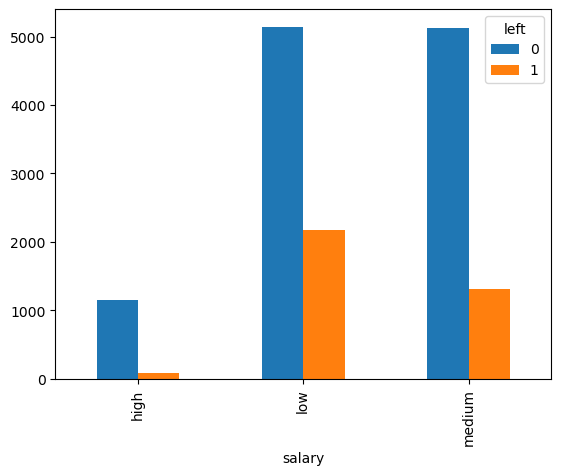

In [54]:
pd.crosstab(df.salary, df.left).plot(kind='bar')

<Axes: xlabel='Department'>

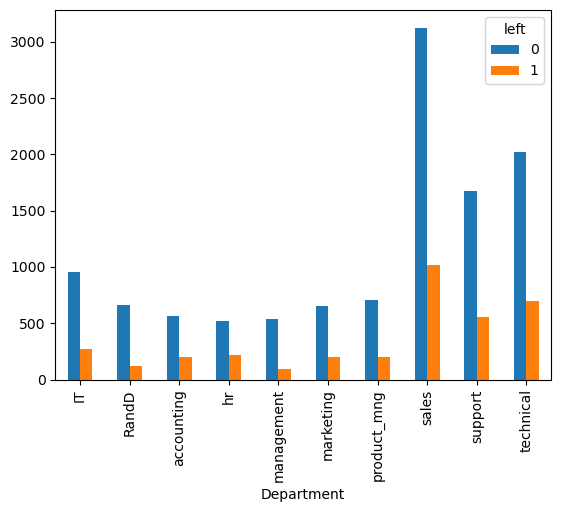

In [55]:
pd.crosstab(df.Department, df.left).plot(kind='bar')

In [56]:
df2 = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary', 'left']].copy()
df2

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,left
0,0.38,157,0,low,1
1,0.80,262,0,medium,1
2,0.11,272,0,medium,1
3,0.72,223,0,low,1
4,0.37,159,0,low,1
...,...,...,...,...,...
14994,0.40,151,0,low,1
14995,0.37,160,0,low,1
14996,0.37,143,0,low,1
14997,0.11,280,0,low,1


In [58]:
salary_dummy = pd.get_dummies(df2.salary, prefix='salary', drop_first=True)
salary_dummy

,salary_low,salary_medium
0,True,False
1,False,True
2,False,True
3,True,False
4,True,False
...,...,...
14994,True,False
14995,True,False
14996,True,False
14997,True,False


In [59]:
df2 = pd.concat([df2, salary_dummy], axis=1)
df2

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,left,salary_low,salary_medium
0,0.38,157,0,low,1,True,False
1,0.80,262,0,medium,1,False,True
2,0.11,272,0,medium,1,False,True
3,0.72,223,0,low,1,True,False
4,0.37,159,0,low,1,True,False
...,...,...,...,...,...,...,...
14994,0.40,151,0,low,1,True,False
14995,0.37,160,0,low,1,True,False
14996,0.37,143,0,low,1,True,False
14997,0.11,280,0,low,1,True,False


In [60]:
df2.drop('salary', axis=1, inplace=True)
df2

,satisfaction_level,average_montly_hours,promotion_last_5years,left,salary_low,salary_medium
0,0.38,157,0,1,True,False
1,0.80,262,0,1,False,True
2,0.11,272,0,1,False,True
3,0.72,223,0,1,True,False
4,0.37,159,0,1,True,False
...,...,...,...,...,...,...
14994,0.40,151,0,1,True,False
14995,0.37,160,0,1,True,False
14996,0.37,143,0,1,True,False
14997,0.11,280,0,1,True,False


In [61]:
X, y = df2.drop('left', axis=1).values, df2.left.values
X, y

(array([[0.38, 157, 0, True, False],
        [0.8, 262, 0, False, True],
        [0.11, 272, 0, False, True],
        ...,
        [0.37, 143, 0, True, False],
        [0.11, 280, 0, True, False],
        [0.37, 158, 0, True, False]], dtype=object),
 array([1, 1, 1, ..., 1, 1, 1]))

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [63]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [64]:
model.fit(X_train, y_train)

LogisticRegression()

In [65]:
model.score(X_test, y_test)

0.7823333333333333

In [68]:
def predict():
  satisfaction_level=float(input())
  average_montly_hours=float(input())
  promotion_last_5years=float(input())
  salary = input()
  if salary.lower=='high':
    data = [satisfaction_level, average_montly_hours, promotion_last_5years, False, False]
  elif salary.lower=='medium':
    data = [satisfaction_level, average_montly_hours, promotion_last_5years, False, True]
  else:
    data = [satisfaction_level, average_montly_hours, promotion_last_5years, True, False]

  cls={0:'Will stay', 1:'Will leave'}

  return f'The prediction is {cls[model.predict([data])[0]]}'

In [70]:
predict()

 0.38
 157
 0
 low


'The prediction is Will stay'